<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/training/NLP_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT - BERT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

---
---

# Exploratory Data Analysis

In [15]:
# importing necessary modules for EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the dataset

---

Load the dataset for usage in the entire project.

In [16]:
# load the train and test datasets
df_train = pd.read_excel('./clean_dataset.xlsx')
df_test = pd.read_excel('./val_dataset.xlsx')

# see the top 5 companies that are populated in the dataframe
df_train.head(5)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",NaN
1,23248790229909752.0,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9E%E5%B8%82%E9%9B%85%E6%B3%B0%E6%B8%85%E6%B4%81%E7%94%A8%E5%93%81%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n",NaN
2,28486505934571008.0,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",NaN
3,38251695094669872.0,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510784.0,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",NaN


---
---

### Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [17]:
# see the row headers of the entire pandas dataframe first
list(df_train.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [18]:
# get the total number of records in the dataframe
df_count = df_train['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = df_train['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = df_train['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = df_train['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = df_train['Valuechain'].nunique()

# get count of total unique archetypes
df_countArchetype = df_train['Archetype'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)
print('Total number of archetypes:', df_countArchetype)

Total number of records: 9600
Total number of countries: 14
Total number of sectors: 16
Total number of subsectors: 37
Total number of valuechain: 18
Total number of archetypes: 94


In [19]:
# get total number of countries
df_totalCountries = df_train['Country'].value_counts()

# get list of unique sector
df_sector = df_train['Sector'].value_counts()

# get list of unique archetype
df_archetype = df_train['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = df_train['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE          3459
MALAYSIA           2200
THAILAND           1817
CHINA               971
HONG KONG           577
INDONESIA           552
VIETNAM              12
MYANMAR               3
AUSTRALIA             2
TAIWAN                2
LABUAN                2
UNITED KINGDOM        1
CANADA                1
INDONESIANO CIF       1
Name: Country, dtype: int64

List of unique sector:
OOS           2082
CNI           1744
REH            942
IND            886
CG             862
ONG            667
TMT            637
cni            258
tmt            188
oos             79
ong             66
ind             11
cg               7
reh              6
                 1
auto & mec       1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1696
Downstream                1221
Midstream                  702
                           659
DOWNSTREAM                 658
midstream                  309
Manufacturer               296
UPSTREAM  

In [20]:
# get list of unique subsector
df_subsector = df_train['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               2161
building_material                     831
retail n distribution                 560
buildings & industrial                542
auto & mec                            482
petrochemical                         421
consumer electronics                  337
metals and mining                     300
residential                           281
cni_service providers                 279
restaurants, catering & services      270
fmcg                                  186
utilities                             178
it_services                           171
commercial                            146
o&g                                   135
mixed                                 129
o&g_service providers/contractors     123
semiconductor                         117
diversified                           114
infrastructure                        107
telecommunication                      88
hotels and accommodation               88
animal p

In [21]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                2161
building_material_manufacturer         573
buildings & industrial_contractor      496
consumer discretionary distributor     358
cni_service providers                  279
                                      ... 
MIDSTREAM                                2
gas and lng                              2
tisp – fiber cable                       2
building material_manufacturer           1
metals and mining                        1
Name: Archetype, Length: 94, dtype: int64


### Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [22]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = df_train.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities."
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n"
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments."
...,...,...,...,...,...,...,...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,"SOONBEE INVESTMENT HOLDINGS is an ACRA-registered entity that has been operating for 41 years 3 months in Singapore since its incorporation y in 1980. Officially, SOONBEE INVESTMENT HOLDINGS PTE. LTD. is registered as Private Limited Company with its address in District 15 (Katong, Joo Chiat, Amber Road), primarily operates in the sector of ""BANK/FINANCIAL HOLDING COMPANIES (INCLUDING INSURANCE HOLDING COMPANY)"", SSIC code - 64201"
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. The company's line of business includes the manufacturing of concrete products from a combination of cement and aggregate.
9598,"SIAM NISSAN EASTERN CO.,LTD.",THAILAND,IND,auto & mec,auto dealer,Trader,Auto Dealership - Retail


### Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [23]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
12,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
28,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
48,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
63,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9576,REAL CHARM INVESTMENT LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
9585,JIJIN INTERNATIONAL TRADE (SHANGHAI),CHINA,NaN,NaN,NaN,NaN,NaN
9592,"QITAI TIANSHAN CEMENT CO., LTD",CHINA,NaN,NaN,NaN,NaN,NaN
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN


In [24]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities."
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n"
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services"
...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,"Bangkok Patana School is Thailand’s original British international school for students from 2 to 18 years. Our not-for-profit school has remained at the forefront of education in Thailand and is today one of the most respected educational establishments in South East Asia. We provide learning from Foundation Stage right through to Senior Studies, for over 2,200 students from around 60 countries. The School follows a modified English National curriculum up to Year 11 and the International Baccalaureate in Years 12 and 13. Bangkok Patana School is committed to nurturing lifelong learners who can adapt to an ever-changing world. Our goal is to give your children the best intellectual, physical and social preparation for their futures."
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,NaN,"Indra is one of the leading global technology and consulting companies and the technological partner for core business operations of its customers world-wide. It is a world-leader in providing proprietary solutions in specific segments in Transport and Defense markets, and a leading firm in Digital Transformation Consultancy and Information Technologies in Spain and Latin America through its affiliate Minsait Its business model is based on a comprehensive range of proprietary products, with a high-value focus and with a high

In [25]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 8447


### Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

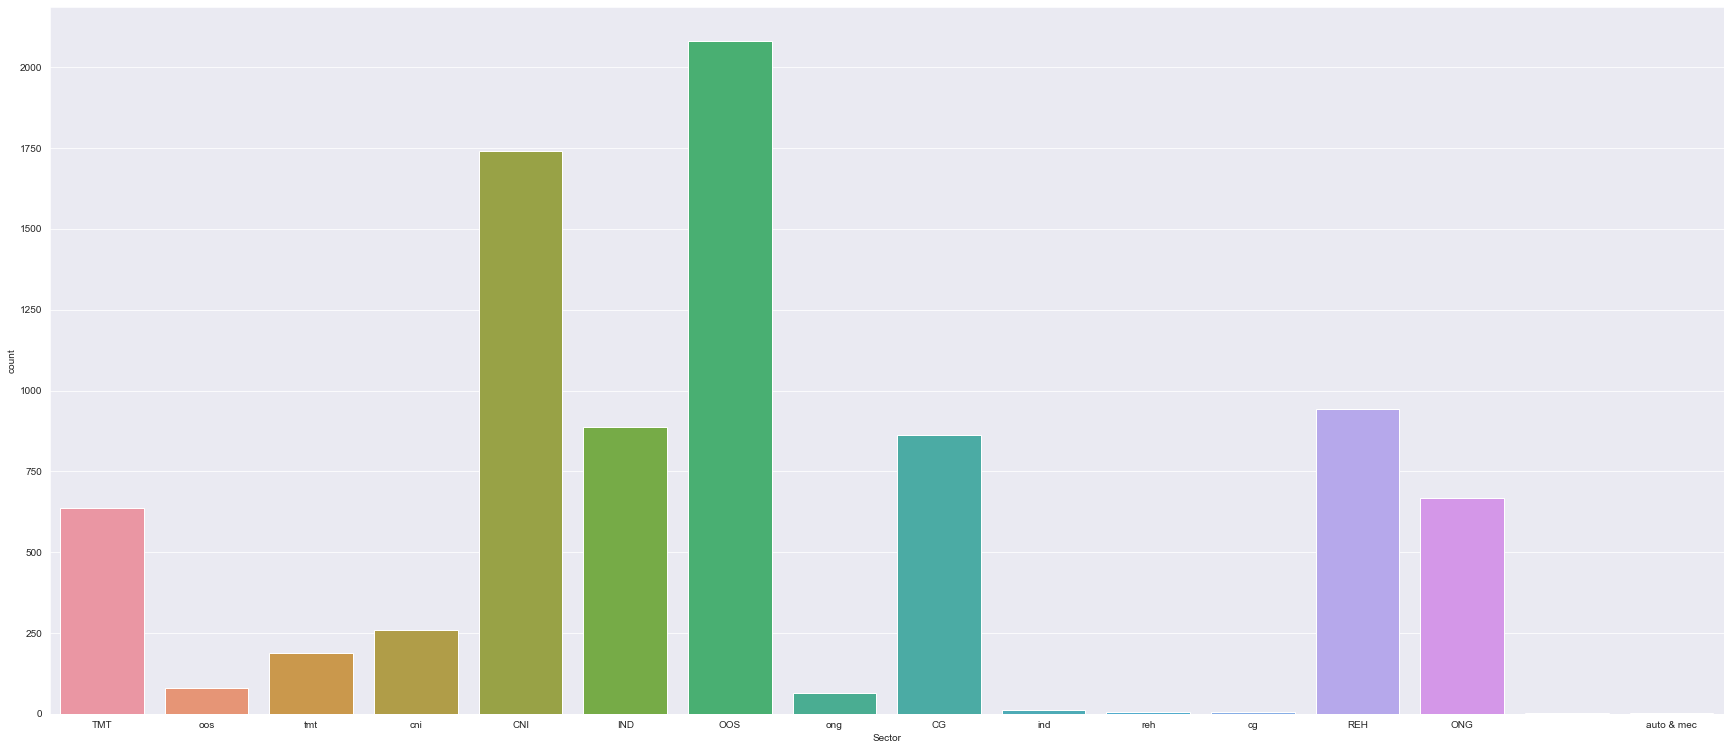

In [26]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the OOS(Others), CNI(Construction And Infrastructure) and REH (Retail And Hospitality).
</div>

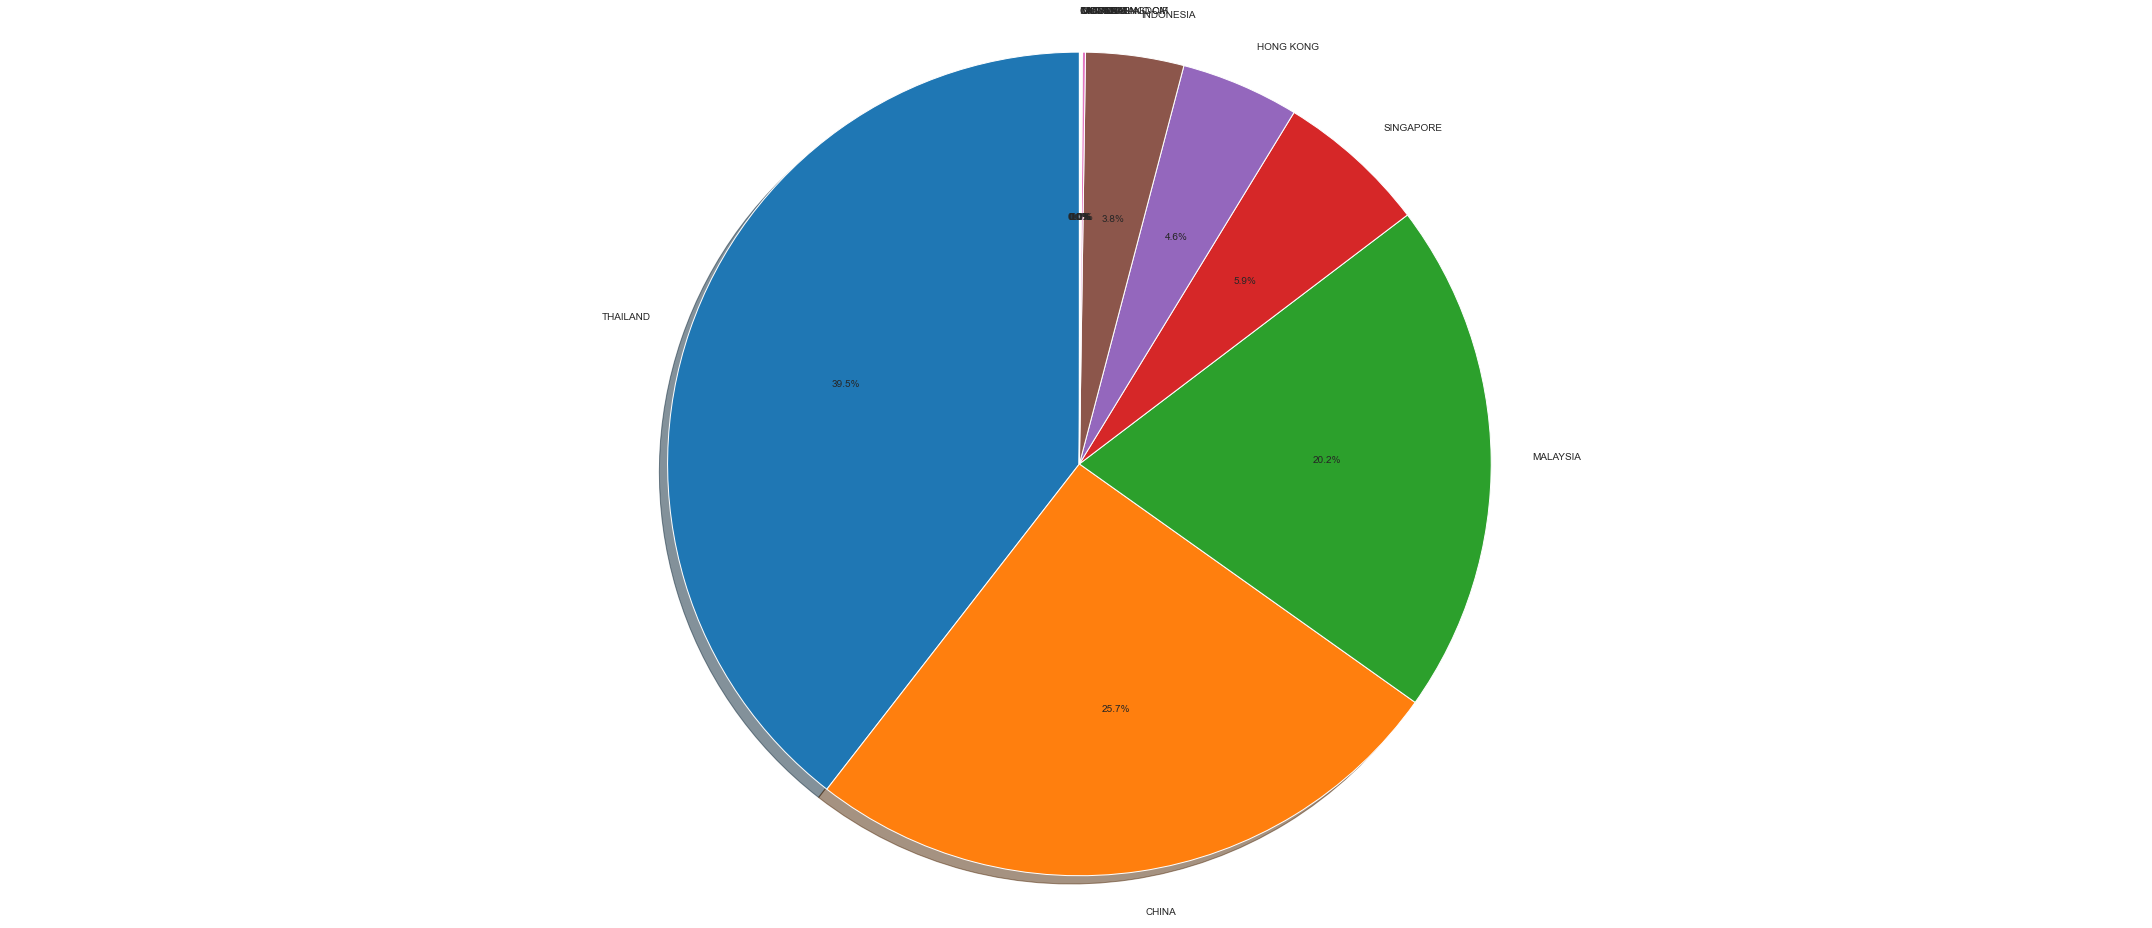

In [27]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Thailand-Based companies, followed up by China, Malaysia and so on.
</div>

### See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [28]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 10 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                    Yatai's main products cover various cleaning machinery, cleaning agents, cl

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>